#House Prices: Advanced Regression Techniques
####Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
import math
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
%matplotlib inline 
from sklearn.linear_model import Ridge,RidgeCV,BayesianRidge,LinearRegression,Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf=KFold(n_splits=10, shuffle=True)
from mlxtend.regressor import StackingCVRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##Exploratory Data Analysis

In [2]:
#Show the first 5 elements of the training set
training_set = pd.read_csv("train.csv")
training_set.head(5)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#Show the first 5 elements of the test set
test_set = pd.read_csv("test.csv")
test_set.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
print("Shape of training set=",training_set.shape)
print("Shape of test set=",test_set.shape)
training_shape_x = training_set.shape[0]
test_Ids = test_set["Id"]

Shape of training set= (1460, 81)
Shape of test set= (1459, 80)


In [5]:
#summary on all the non-categorical values
training_set.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


skewness= 1.8828757597682129
kurtosis= 6.536281860064529


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Sale Price'),
 Text(0.5, 1.0, 'Range of Sale Price')]

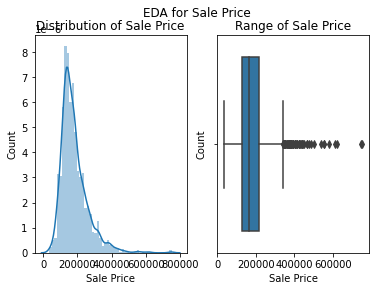

In [6]:
#Finding about the dependent variable "SalePrice"'s distribution
print("skewness=",training_set['SalePrice'].skew())
print("kurtosis=",training_set['SalePrice'].kurt())

f, axs = plt.subplots(nrows= 1,ncols = 2,)
f.suptitle("EDA for Sale Price")
sns.distplot(training_set["SalePrice"],ax = axs[0])
axs[0].set(xlabel='Sale Price' , ylabel='Count', title="Distribution of Sale Price")
sns.boxplot(training_set["SalePrice"],ax = axs[1])
axs[1].set(xlabel='Sale Price', ylabel='Count', title="Range of Sale Price")


skewness= 0.12134661989685333
kurtosis= 0.809519155707878


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Sale Price'),
 Text(0.5, 1.0, 'Range of Sale Price')]

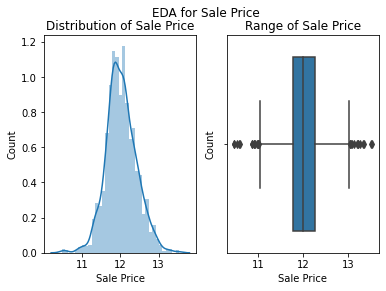

In [7]:
#Scaling down using log transformation
training_set['SalePrice'] = np.log1p(training_set['SalePrice'])
print("skewness=",training_set['SalePrice'].skew())
print("kurtosis=",training_set['SalePrice'].kurt())

f, axs = plt.subplots(nrows= 1,ncols = 2,)
f.suptitle("EDA for Sale Price")
sns.distplot(training_set["SalePrice"],ax = axs[0])
axs[0].set(xlabel='Sale Price' , ylabel='Count', title="Distribution of Sale Price")
sns.boxplot(training_set["SalePrice"],ax = axs[1])
axs[1].set(xlabel='Sale Price', ylabel='Count', title="Range of Sale Price")


In [8]:
#Finding count of categorical and non-categorical values
#We notice that we have 43 object types and 35 integer types
print("\nCount of all datatypes")
print(training_set.dtypes.value_counts())
print("\nnon-categorical variables")
print(training_set.select_dtypes(exclude=['object']).columns)
print("\ncategorical variables")
print(training_set.select_dtypes(include=['object']).columns)


Count of all datatypes
object     43
int64      34
float64     4
dtype: int64

non-categorical variables
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

categorical variables
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQua

In [9]:
#datatypes of all columns
#Using group by statement to group all columns according to their datatypes
groupby_datatypes = {str(k): ', '.join(list(v)) for k, v in training_set.groupby(training_set.dtypes, axis = 1)}
for i in groupby_datatypes:
  print(i,":", groupby_datatypes[i])

int64 : Id, MSSubClass, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold
float64 : LotFrontage, MasVnrArea, GarageYrBlt, SalePrice
object : MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence, MiscFeature, SaleType, SaleCondition


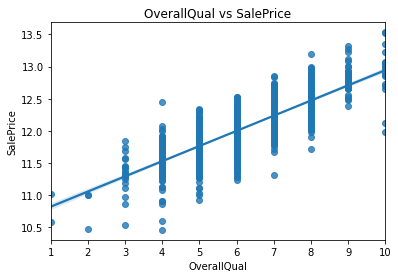

pearson_co-efficient= 0.82  p-value= 0.0


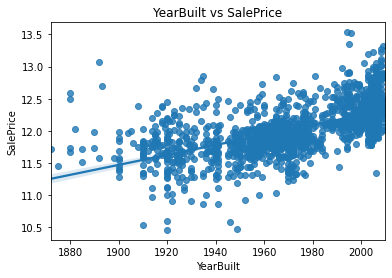

pearson_co-efficient= 0.59  p-value= 1.1036359100659409e-135


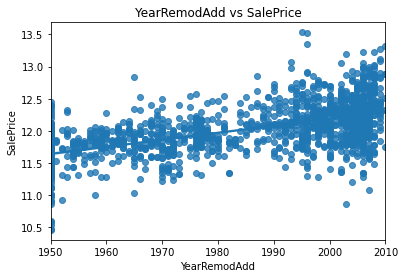

pearson_co-efficient= 0.57  p-value= 3.211680352821055e-124


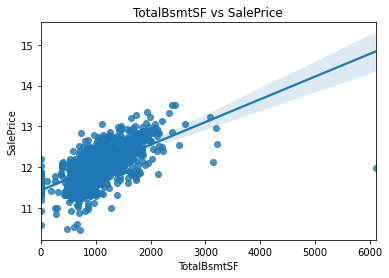

pearson_co-efficient= 0.61  p-value= 7.531828096458291e-151


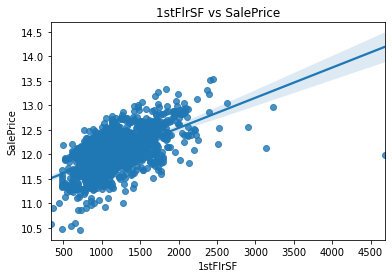

pearson_co-efficient= 0.60  p-value= 1.0742929799904708e-141


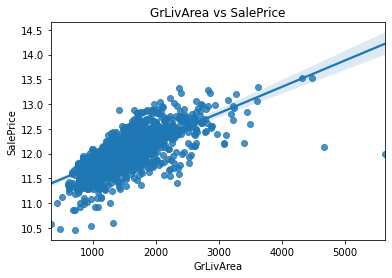

pearson_co-efficient= 0.70  p-value= 3.058151110247845e-216


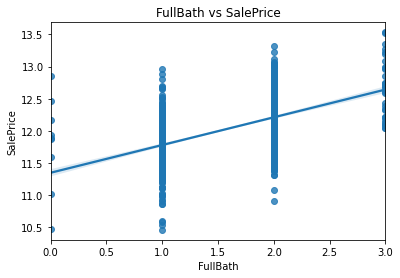

pearson_co-efficient= 0.59  p-value= 2.1186081278440095e-140


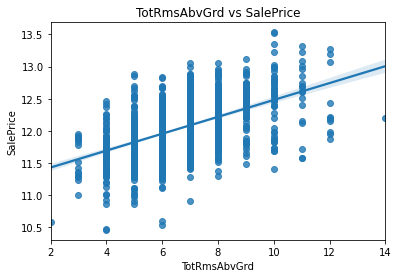

pearson_co-efficient= 0.53  p-value= 1.2925262145281519e-108


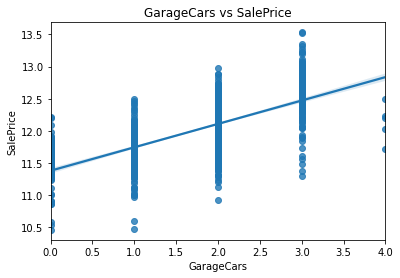

pearson_co-efficient= 0.68  p-value= 3.093382269757451e-199


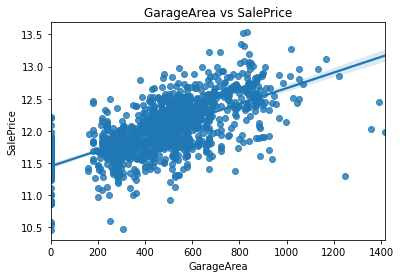

pearson_co-efficient= 0.65  p-value= 1.1060270514523493e-176


In [10]:
#Let us see the relationship of every variable wrt to Sale Price by using a Pearson Correlation coefficient and a regplot and let us try to plot only those variables which are 
#more then 0.5 or less than -0.5 to ensure they are moderately to strongly correlated
for i in test_set.select_dtypes(exclude=['object']).columns:
  if training_set[i].isna().sum() == 0:
    pearson_coef, p_value = stats.pearsonr(training_set[i], training_set["SalePrice"])
    if pearson_coef <= -0.5 or pearson_coef >= 0.5:
      fig, axs = plt.subplots(1)
      sns.regplot(x = i, y = "SalePrice", data=training_set).set_title(i+" vs SalePrice")
      plt.show()
      print("pearson_co-efficient= %.2f" % pearson_coef, " p-value=", p_value)


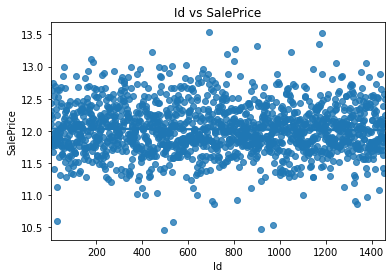

pearson_co-efficient= -0.02  p-value= 0.49331382469447654


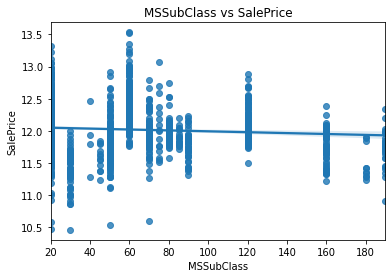

pearson_co-efficient= -0.07  p-value= 0.004692354057563487


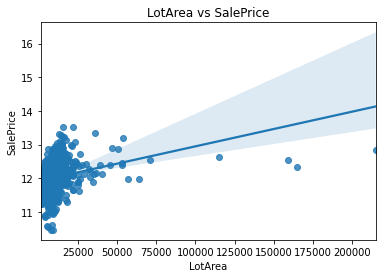

pearson_co-efficient= 0.26  p-value= 1.6438769785249644e-23


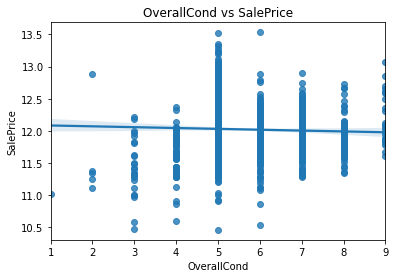

pearson_co-efficient= -0.04  p-value= 0.1591270006839557


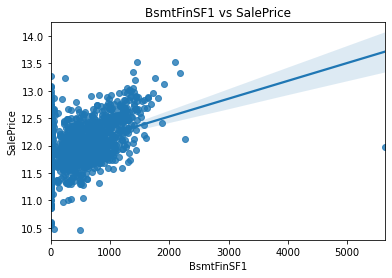

pearson_co-efficient= 0.37  p-value= 3.845514461128919e-49


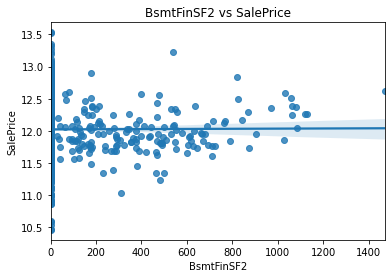

pearson_co-efficient= 0.00  p-value= 0.8536335149683948


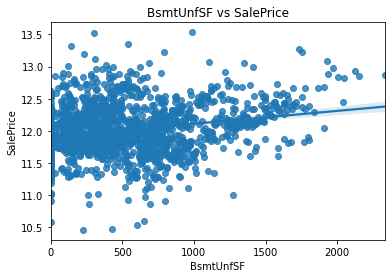

pearson_co-efficient= 0.22  p-value= 9.318170150531841e-18


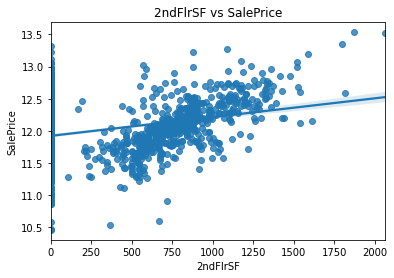

pearson_co-efficient= 0.32  p-value= 5.866428884910498e-36


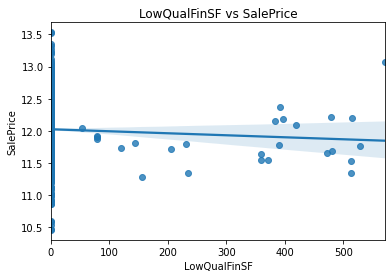

pearson_co-efficient= -0.04  p-value= 0.14710419520114687


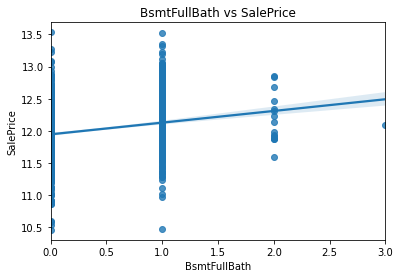

pearson_co-efficient= 0.24  p-value= 5.791601052874469e-20


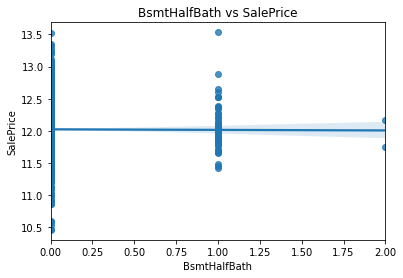

pearson_co-efficient= -0.01  p-value= 0.8441522695814745


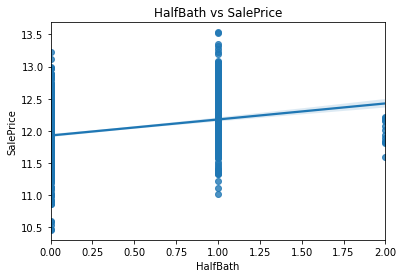

pearson_co-efficient= 0.31  p-value= 9.133252859236503e-35


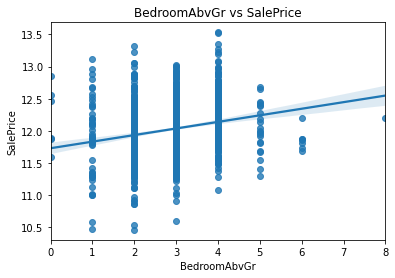

pearson_co-efficient= 0.21  p-value= 7.028888840210457e-16


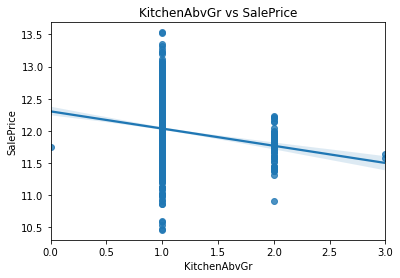

pearson_co-efficient= -0.15  p-value= 1.4787989464585924e-08


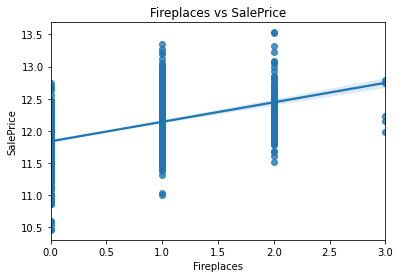

pearson_co-efficient= 0.49  p-value= 8.420418798332365e-89


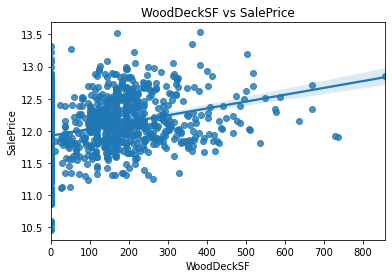

pearson_co-efficient= 0.33  p-value= 2.0552120426907593e-39


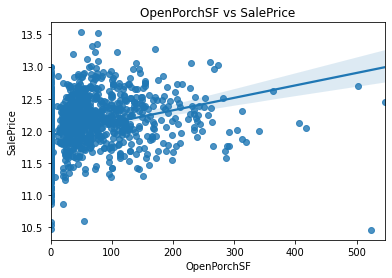

pearson_co-efficient= 0.32  p-value= 2.344281818586504e-36


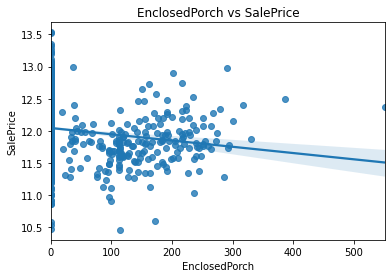

pearson_co-efficient= -0.15  p-value= 1.0508215748893132e-08


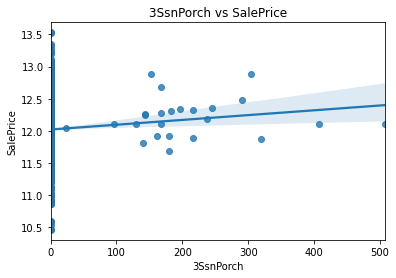

pearson_co-efficient= 0.05  p-value= 0.03594765591668819


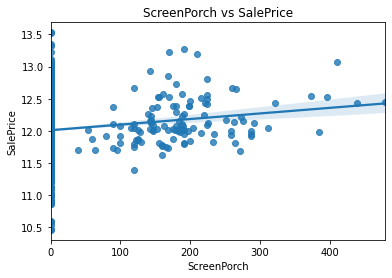

pearson_co-efficient= 0.12  p-value= 3.4089811751464176e-06


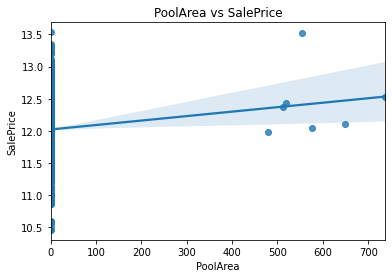

pearson_co-efficient= 0.07  p-value= 0.007631702937229532


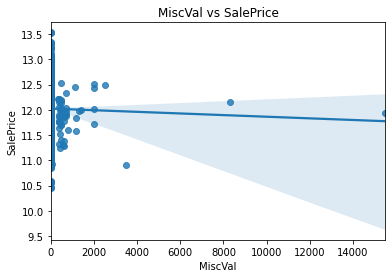

pearson_co-efficient= -0.02  p-value= 0.44461951036245456


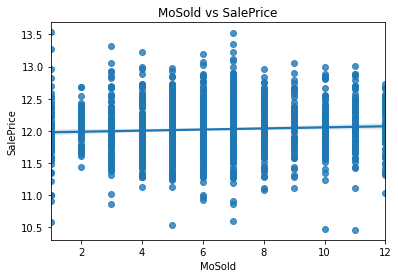

pearson_co-efficient= 0.06  p-value= 0.028489244154613565


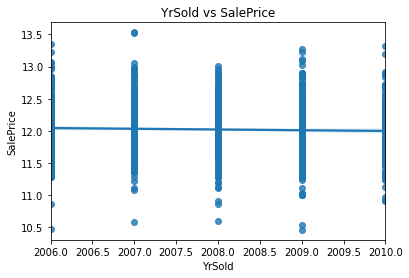

pearson_co-efficient= -0.04  p-value= 0.154710494643881


In [11]:
#display relationships between other non-categorical variables and SalePrice whose Pearson coefficient is between -0.5 to 0.5, We find that 
#These variables aren't correlated with the sale price strongly
for i in test_set.select_dtypes(exclude=['object']).columns:
  if training_set[i].isna().sum() == 0:
    pearson_coef, p_value = stats.pearsonr(training_set[i], training_set["SalePrice"])
    if pearson_coef > -0.5 and pearson_coef < 0.5:
      fig, axs = plt.subplots(1)
      sns.regplot(x = i, y = "SalePrice", data=training_set).set_title(i+" vs SalePrice")
      plt.show()
      print("pearson_co-efficient= %.2f" % pearson_coef, " p-value=", p_value)

In [12]:
def BarPlotCount(ax,values):
    cnt = 0
    for p in ax.patches:
      height = p.get_height()
      ax.text(p.get_x()+p.get_width()/2., height + 0.5, values[cnt],ha="center")
      cnt += 1
    

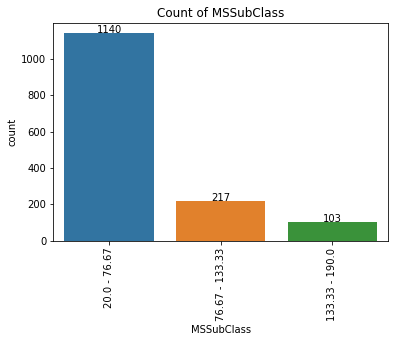

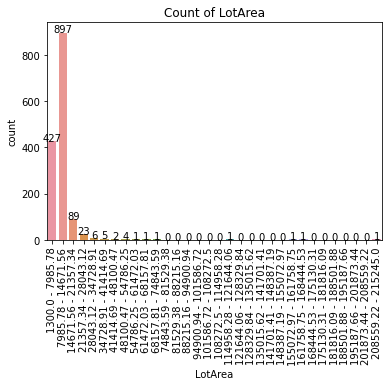

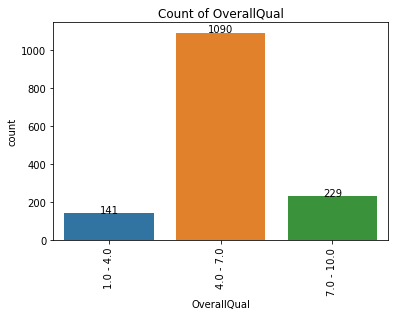

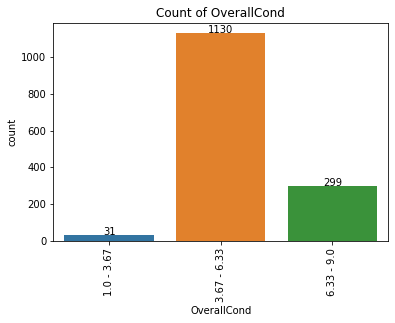

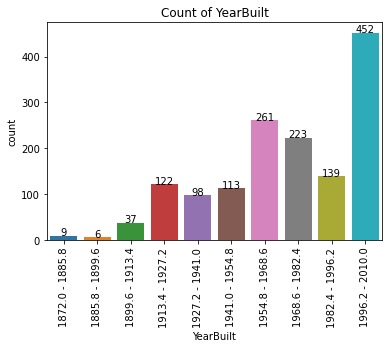

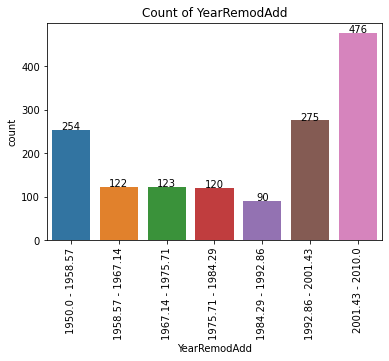

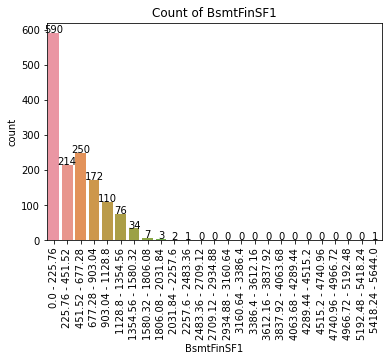

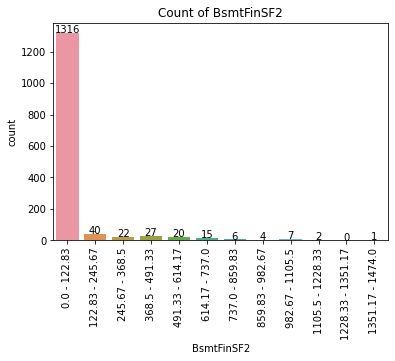

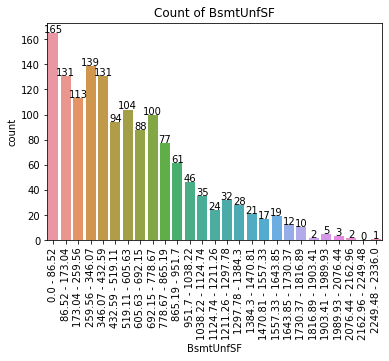

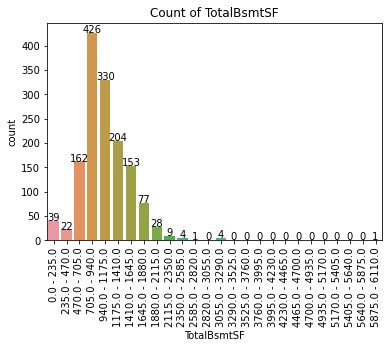

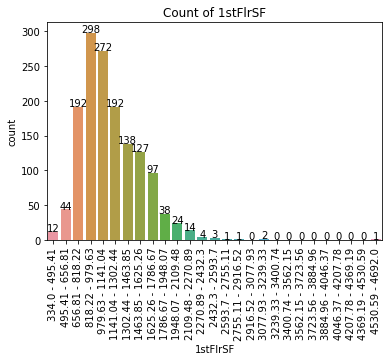

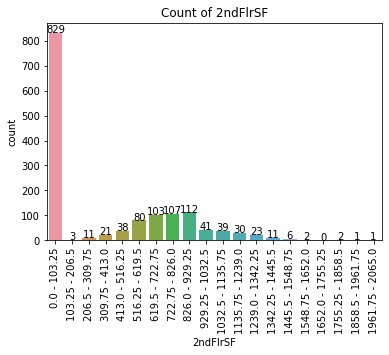

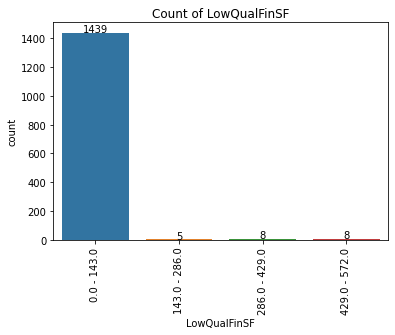

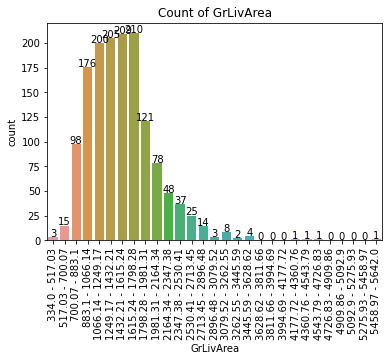

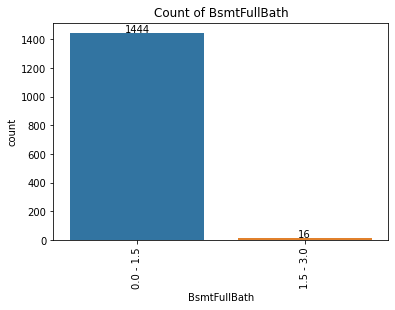

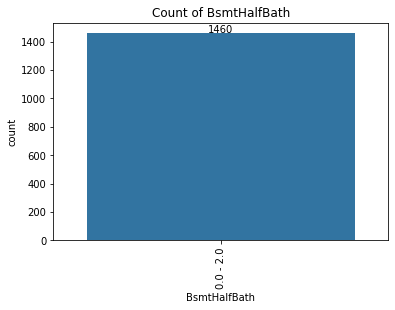

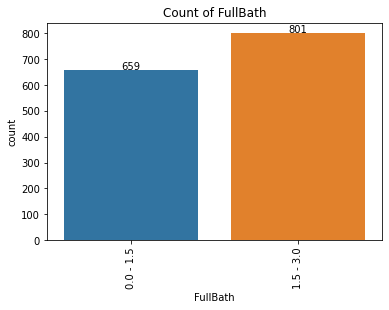

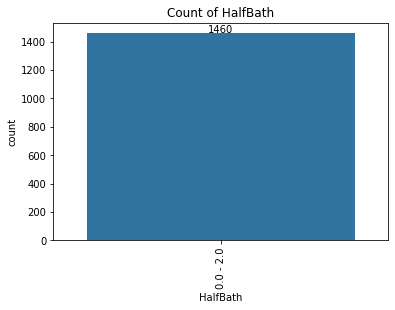

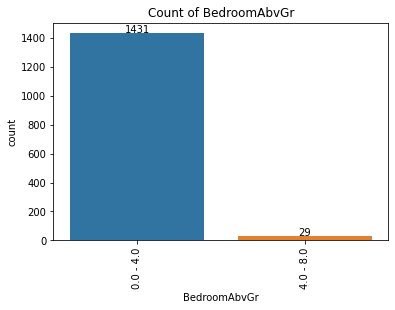

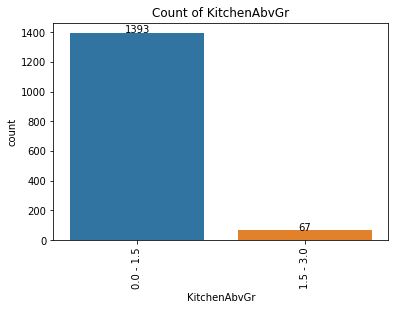

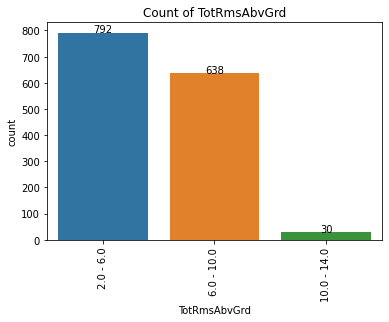

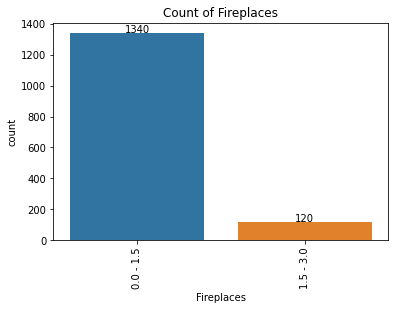

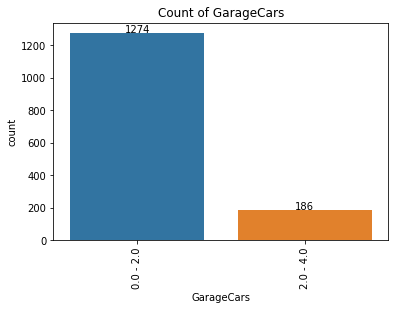

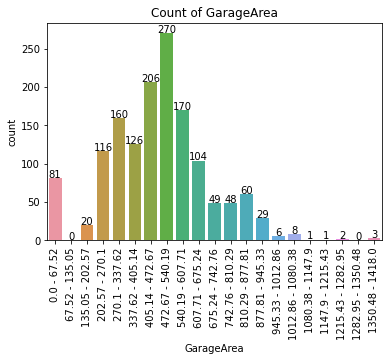

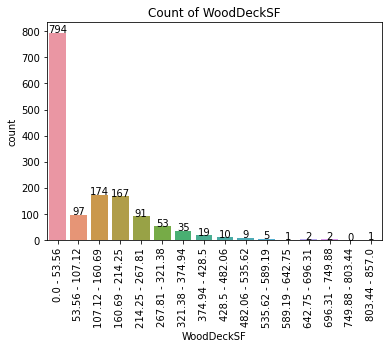

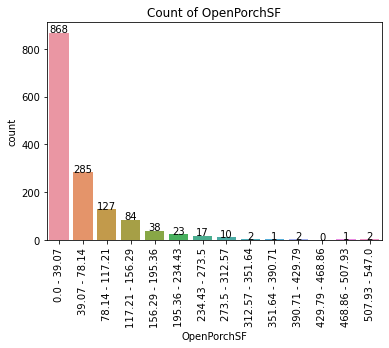

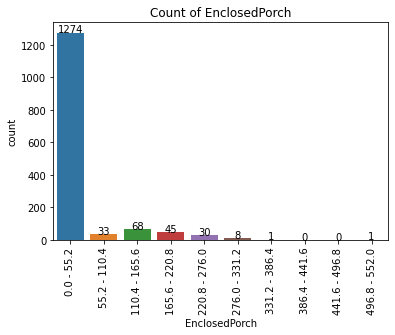

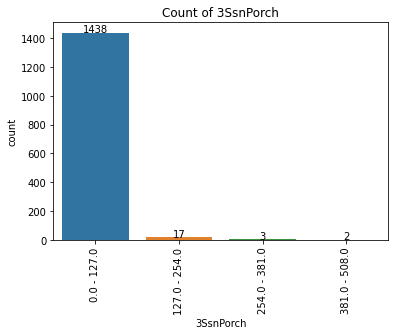

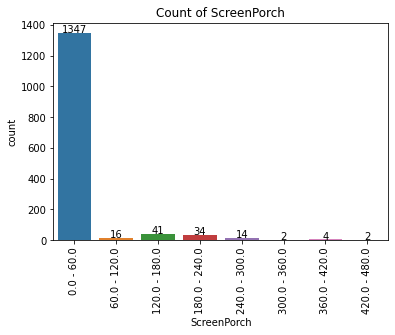

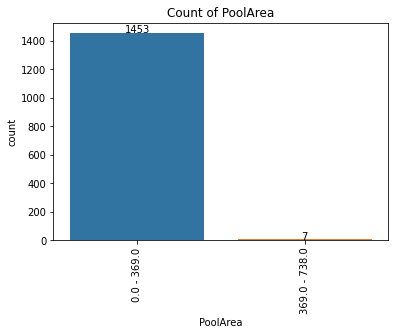

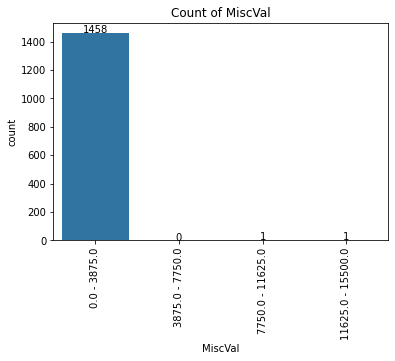

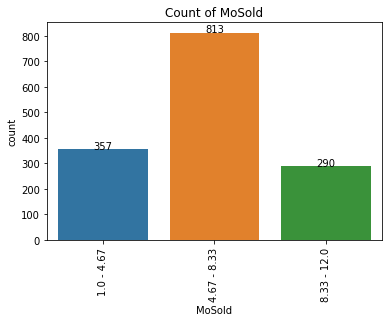

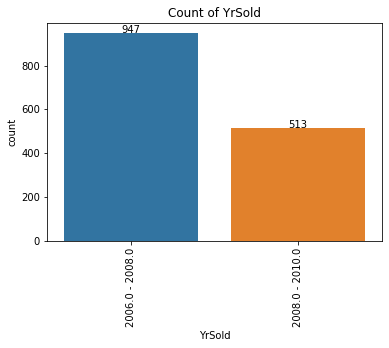

In [13]:
#Applying binning and hist plot for all the non-categorical values to understand more about outliers and distribution within the variables
for i in test_set.select_dtypes(exclude=['object']).columns:
  if training_set[i].isna().sum() == 0 and i != "Id":
    names = []
    values = []
    temp_df = pd.DataFrame()

    #Performing binning
    bins = np.linspace(min(training_set[i]), max(training_set[i]), int(math.sqrt(len(training_set[i].unique()))) + 1)
    for j in range(0,len(bins) - 1):
      names.append(str(round(bins[j],2)) + " - " + str(round(bins[j+1],2)))
    temp_df["data"] = pd.cut(training_set[i], bins,labels=names, include_lowest=True)
    
    #Re-arranging lists from value counts 
    key = temp_df["data"].value_counts().index.tolist()
    value = list(temp_df["data"].value_counts())
    for name in names:
      values.append(value[key.index(name)])

    #Plotting a barplot
    fig, axs = plt.subplots(1)
    ax = sns.barplot(x=names, y=values)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title("Count of " + i )
    ax.set_xlabel(i)
    ax.set_ylabel("count")
    cnt = 0
    BarPlotCount(ax,values)
    plt.show()

    

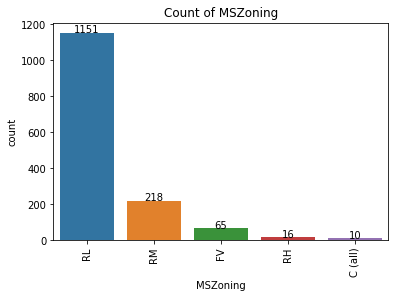

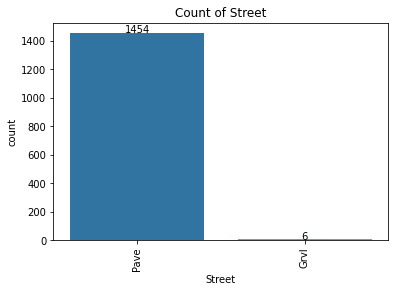

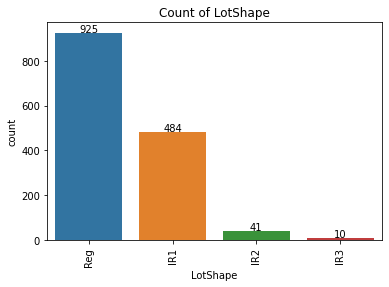

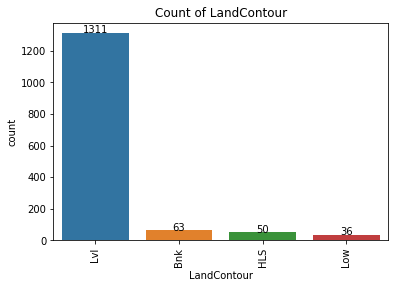

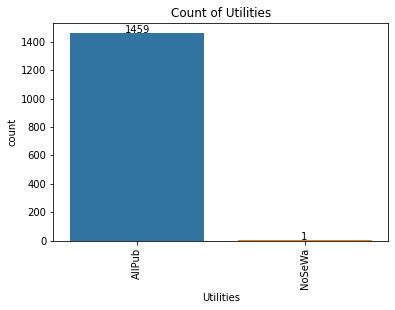

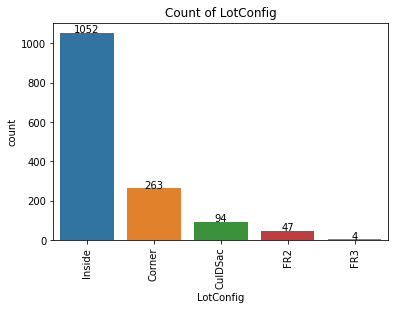

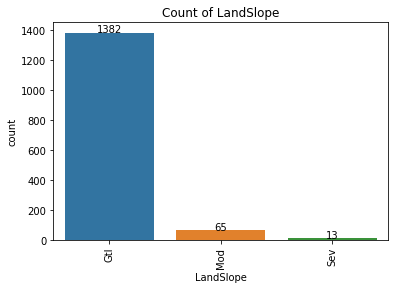

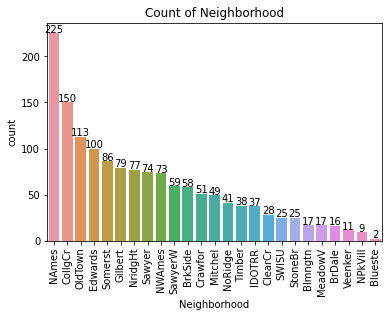

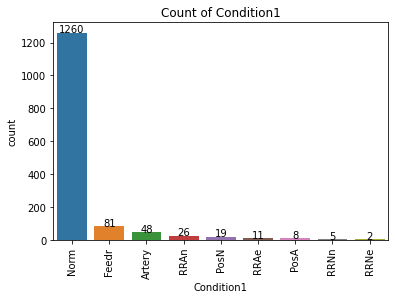

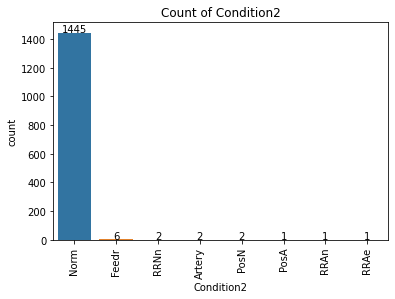

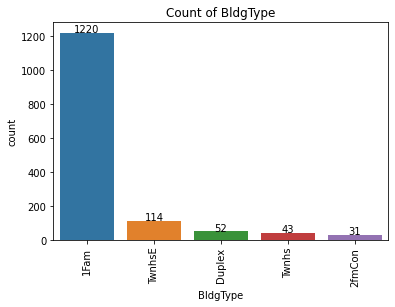

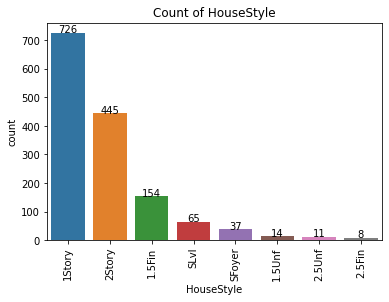

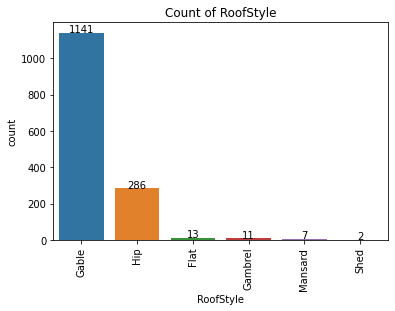

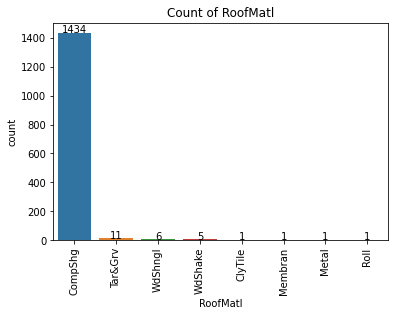

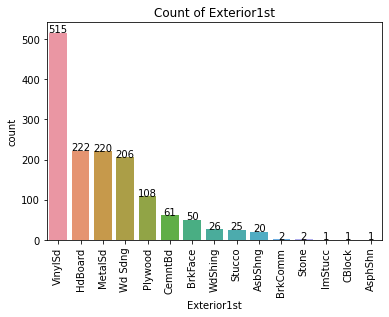

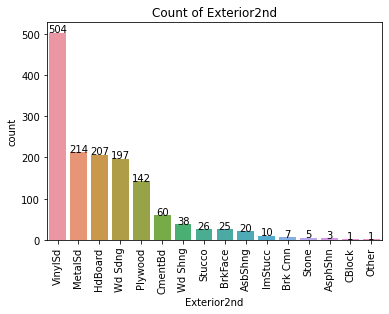

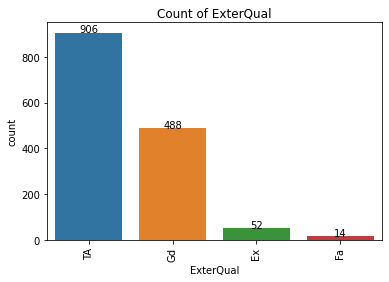

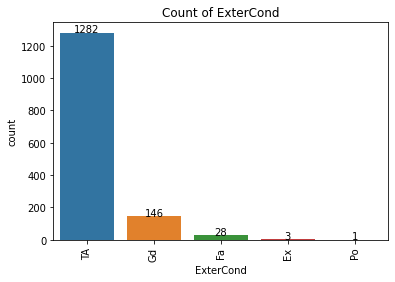

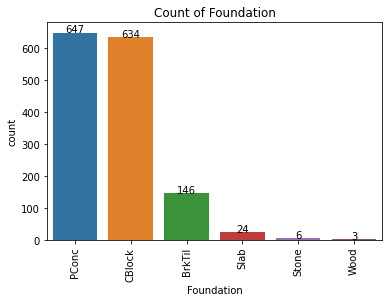

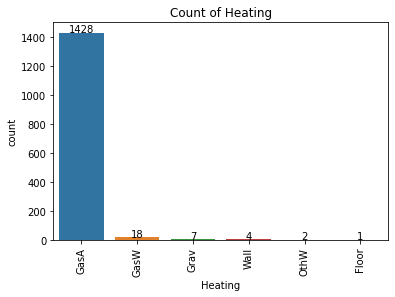

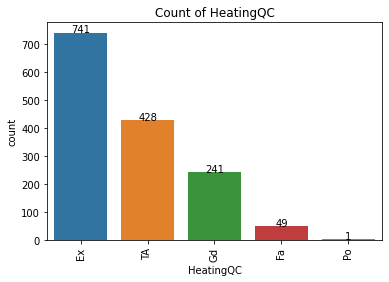

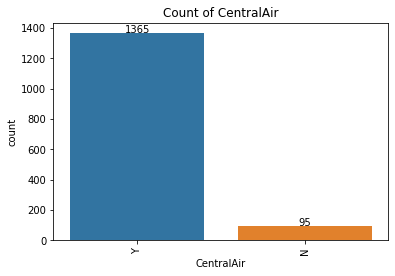

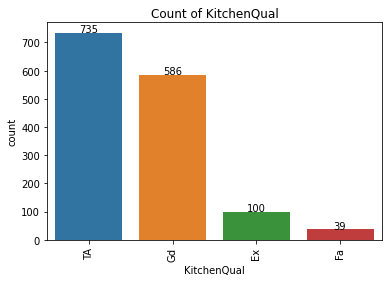

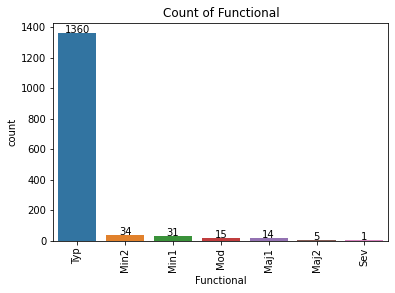

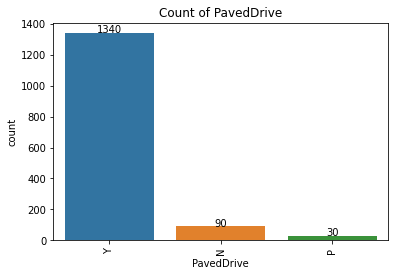

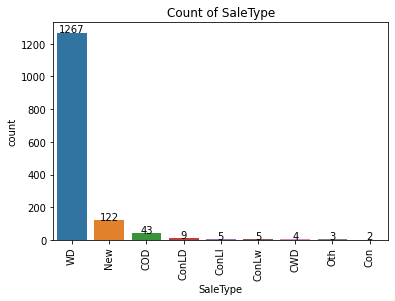

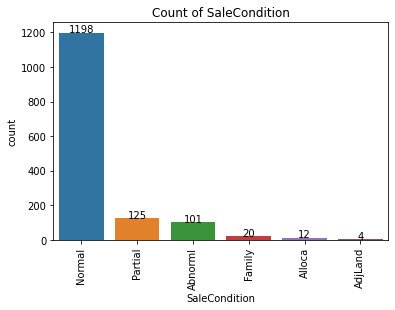

In [14]:
#Finding out the same count for categorical values 
for i in test_set.select_dtypes(include=['object']).columns:
  if training_set[i].isna().sum() == 0:
    
    names = training_set[i].value_counts().index.tolist()
    values = list(training_set[i].value_counts())
    
    #Plotting a barplot
    fig, axs = plt.subplots(1)
    ax = sns.barplot(x=names, y=values)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title("Count of " + i )
    ax.set_xlabel(i)
    ax.set_ylabel("count")
    #Print count on top of bar plots
    BarPlotCount(ax,values)
    plt.show()


##Data Wrangling
####Counting Null Values

In [15]:
#Data Wrangling
train_Y = training_set.iloc[:, -1]
training_set.drop(labels=["SalePrice"], axis=1, inplace= True)
#1.count of null values in every row and column and store in a dictionary for future purposes

NullCountCombinedDict = {}
#Let concat test set and training set, to perform equal transformations
combined_set = pd.concat([training_set, test_set])
combined_set.drop(labels=["Id"], axis=1, inplace= True)

for column in combined_set.isna().columns.values.tolist():
  print("\n"+ column)

  names = combined_set[column].isna().value_counts().index.tolist()
  values = combined_set[column].isna().value_counts().tolist()
  total = sum(values)

  if True in names:
    TrueCount = values[names.index(True)]
    print("Null values = ", TrueCount)
    print("Null value percentage = %.2f"% ((TrueCount/total)*100) + "%")
    NullCountCombinedDict[column] = round((TrueCount/total)*100,2)
  else:
    print("Null values = 0")
    print("Null value percentage = 0.0%")
    NullCountCombinedDict[column] = 0



MSSubClass
Null values = 0
Null value percentage = 0.0%

MSZoning
Null values =  4
Null value percentage = 0.14%

LotFrontage
Null values =  486
Null value percentage = 16.65%

LotArea
Null values = 0
Null value percentage = 0.0%

Street
Null values = 0
Null value percentage = 0.0%

Alley
Null values =  2721
Null value percentage = 93.22%

LotShape
Null values = 0
Null value percentage = 0.0%

LandContour
Null values = 0
Null value percentage = 0.0%

Utilities
Null values =  2
Null value percentage = 0.07%

LotConfig
Null values = 0
Null value percentage = 0.0%

LandSlope
Null values = 0
Null value percentage = 0.0%

Neighborhood
Null values = 0
Null value percentage = 0.0%

Condition1
Null values = 0
Null value percentage = 0.0%

Condition2
Null values = 0
Null value percentage = 0.0%

BldgType
Null values = 0
Null value percentage = 0.0%

HouseStyle
Null values = 0
Null value percentage = 0.0%

OverallQual
Null values = 0
Null value percentage = 0.0%

OverallCond
Null values = 0
Nul

In [16]:
#Analysing data from null columns
NACols = [(key, NullCountCombinedDict[key]) for key in NullCountCombinedDict if NullCountCombinedDict[key] > 0]
NACols

[('MSZoning', 0.14),
 ('LotFrontage', 16.65),
 ('Alley', 93.22),
 ('Utilities', 0.07),
 ('Exterior1st', 0.03),
 ('Exterior2nd', 0.03),
 ('MasVnrType', 0.82),
 ('MasVnrArea', 0.79),
 ('BsmtQual', 2.77),
 ('BsmtCond', 2.81),
 ('BsmtExposure', 2.81),
 ('BsmtFinType1', 2.71),
 ('BsmtFinSF1', 0.03),
 ('BsmtFinType2', 2.74),
 ('BsmtFinSF2', 0.03),
 ('BsmtUnfSF', 0.03),
 ('TotalBsmtSF', 0.03),
 ('Electrical', 0.03),
 ('BsmtFullBath', 0.07),
 ('BsmtHalfBath', 0.07),
 ('KitchenQual', 0.03),
 ('Functional', 0.07),
 ('FireplaceQu', 48.65),
 ('GarageType', 5.38),
 ('GarageYrBlt', 5.45),
 ('GarageFinish', 5.45),
 ('GarageCars', 0.03),
 ('GarageArea', 0.03),
 ('GarageQual', 5.45),
 ('GarageCond', 5.45),
 ('PoolQC', 99.66),
 ('Fence', 80.44),
 ('MiscFeature', 96.4),
 ('SaleType', 0.03)]

In [17]:
#Functions for fill NA columns
def fillNA(df, column, value):
  df[column].fillna(value = value, inplace = True)

def fillNAmode(df, column):
  df[column].fillna(value = df[column].mode()[0], inplace = True)


In [18]:
#Show only those columns having an NA value
NACombinedCols = [(key, NullCountCombinedDict[key]) for key in NullCountCombinedDict\
                  if NullCountCombinedDict[key] > 0]
print("Null Columns")
print(NACombinedCols)


#Dropping Pool QC as the number of NAs is 99%
combined_set.drop("PoolQC", axis = 1, inplace=True)
combined_set.drop("MiscFeature", axis = 1, inplace=True)

#Can change value of Garage area and Garage cars and GarageType as 0 as NA represents 0 area and year respectively
fillNA(combined_set, "GarageArea", 0)
fillNA(combined_set, "GarageCars", 0)
fillNA(combined_set, "GarageYrBlt", 0)

#Can change value of Garage Type and Garage Yr Blt as No as NA represents it was never built
fillNA(combined_set, "GarageType", "No")
fillNA(combined_set, "GarageCond", "No")
fillNA(combined_set, "GarageQual", "No")
fillNA(combined_set, "GarageFinish", "No")

#For Utilities we can fillNA column as AllPub is the highest value
fillNAmode(combined_set, "Utilities")

#For Exterior1st we can fillNA column as VinylSd is the highest value
fillNAmode(combined_set, "Exterior1st")
fillNAmode(combined_set, "Exterior2nd")

#For MSZoning we can fill the most common value that is the RL value
fillNAmode(combined_set, "MSZoning")


#Filling LotFrontage by grouping Neighborhood by mean
combined_set["LotFrontage"] = combined_set["LotFrontage"].fillna(combined_set.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.mean())))

#Filling Alley with value as "No" as the count of NA represents a seperate value
fillNA(combined_set, "Alley", "No")


#Filling MasVnrType as using mode of MasVnrArea
fillNAmode(combined_set, "MasVnrType")
combined_set["MasVnrArea"] = combined_set["MasVnrArea"].fillna(combined_set.groupby("MasVnrType")["MasVnrArea"].transform(lambda x: x.fillna(x.mean())))

#Filling below columns with No as they represent a different valueset
fillNA(combined_set, "BsmtQual", "No")
fillNA(combined_set, "BsmtCond", "No")
fillNA(combined_set, "BsmtExposure", "Other")
fillNA(combined_set, "BsmtFinType1", "No")
fillNA(combined_set, "BsmtFinType2", "No")
fillNA(combined_set, "BsmtFinSF1", 0)
fillNA(combined_set, "BsmtFinSF2", 0)
fillNA(combined_set, "TotalBsmtSF", 0)
fillNA(combined_set, "BsmtUnfSF", 0)

#Filling Electrical with mode 
fillNAmode(combined_set, "Electrical")


#Filling BsmtFullBath and BsmtHalfBath with 0 as they are empty columns
fillNA(combined_set, "BsmtFullBath", 0)
fillNA(combined_set, "BsmtHalfBath", 0)

#Filling KitchenQual, SaleType and Functional with mode
fillNAmode(combined_set, "KitchenQual")
fillNAmode(combined_set, "Functional")
fillNAmode(combined_set, "SaleType")

#Filling FireplaceQu with No 
fillNA(combined_set, "FireplaceQu", "No")
fillNA(combined_set, "Fence", "No")
#fillNA(combined_set, "MiscFeature", "No")


#Converting years to string as so they can be one hot encoded
combined_set["YearBuilt"] = combined_set["YearBuilt"].astype(str)
combined_set["YearRemodAdd"] = combined_set["YearRemodAdd"].astype(str)
combined_set["YrSold"] = combined_set["YrSold"].astype(str)



Null Columns
[('MSZoning', 0.14), ('LotFrontage', 16.65), ('Alley', 93.22), ('Utilities', 0.07), ('Exterior1st', 0.03), ('Exterior2nd', 0.03), ('MasVnrType', 0.82), ('MasVnrArea', 0.79), ('BsmtQual', 2.77), ('BsmtCond', 2.81), ('BsmtExposure', 2.81), ('BsmtFinType1', 2.71), ('BsmtFinSF1', 0.03), ('BsmtFinType2', 2.74), ('BsmtFinSF2', 0.03), ('BsmtUnfSF', 0.03), ('TotalBsmtSF', 0.03), ('Electrical', 0.03), ('BsmtFullBath', 0.07), ('BsmtHalfBath', 0.07), ('KitchenQual', 0.03), ('Functional', 0.07), ('FireplaceQu', 48.65), ('GarageType', 5.38), ('GarageYrBlt', 5.45), ('GarageFinish', 5.45), ('GarageCars', 0.03), ('GarageArea', 0.03), ('GarageQual', 5.45), ('GarageCond', 5.45), ('PoolQC', 99.66), ('Fence', 80.44), ('MiscFeature', 96.4), ('SaleType', 0.03)]


In [19]:
#Finding total number of null values in the entire dataframe
combined_set.isna().sum().sum()

0

####Fixing Skewed columns

In [20]:
#Finding Skewed columns
combined_set[combined_set.select_dtypes(exclude=['object']).columns].apply(lambda x: x.skew()).sort_values()

GarageYrBlt      -3.908213
GarageCars       -0.219694
FullBath          0.167692
MoSold            0.195985
OverallQual       0.197212
GarageArea        0.239380
BedroomAbvGr      0.326492
OverallCond       0.570605
BsmtFullBath      0.625153
HalfBath          0.694924
Fireplaces        0.733872
TotRmsAbvGrd      0.758757
2ndFlrSF          0.862118
BsmtUnfSF         0.919812
TotalBsmtSF       1.157489
GrLivArea         1.270010
MSSubClass        1.376165
BsmtFinSF1        1.425963
LotFrontage       1.461180
1stFlrSF          1.470360
WoodDeckSF        1.843380
OpenPorchSF       2.536417
MasVnrArea        2.615022
BsmtHalfBath      3.933616
ScreenPorch       3.948723
EnclosedPorch     4.005950
BsmtFinSF2        4.148275
KitchenAbvGr      4.304467
3SsnPorch        11.381914
LowQualFinSF     12.094977
LotArea          12.829025
PoolArea         16.907017
MiscVal          21.958480
dtype: float64

In [21]:
#Splitting into Keys and Values by using filter and map
values = combined_set[combined_set.select_dtypes(exclude=['object']).columns].apply(lambda x: x.skew()).sort_values().tolist()
keys = combined_set[combined_set.select_dtypes(exclude=['object']).columns].apply(lambda x: x.skew()).sort_values().index.tolist()
combination = filter(lambda x: x[1] > 1, zip(keys, values))
keys,values = map(list,zip(*combination))

#Applying boxcox1p to reduce the skewness factor
for key in keys:
  combined_set[key] = boxcox1p(combined_set[key], boxcox_normmax(combined_set[key]+ 1))

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:3538: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


In [22]:
#Again checking the skewness factor. 
combined_set[combined_set.select_dtypes(exclude=['object']).columns].apply(lambda x: x.skew()).sort_values()

GarageYrBlt      -3.908213
GarageCars       -0.219694
LotArea          -0.135470
1stFlrSF         -0.011617
GrLivArea         0.004851
LotFrontage       0.027098
FullBath          0.167692
MoSold            0.195985
OverallQual       0.197212
GarageArea        0.239380
BedroomAbvGr      0.326492
TotalBsmtSF       0.369852
BsmtFinSF1        0.374894
MSSubClass        0.437648
OverallCond       0.570605
OpenPorchSF       0.621345
BsmtFullBath      0.625153
HalfBath          0.694924
Fireplaces        0.733872
TotRmsAbvGrd      0.758757
WoodDeckSF        0.785172
2ndFlrSF          0.862118
BsmtUnfSF         0.919812
MasVnrArea        0.969540
EnclosedPorch     2.151263
BsmtFinSF2        2.580794
ScreenPorch       3.155533
KitchenAbvGr      3.781840
BsmtHalfBath      3.782904
MiscVal           5.242589
LowQualFinSF      8.499971
3SsnPorch         8.869703
PoolArea         14.993700
dtype: float64

####Fixing Categories in Categorical values 

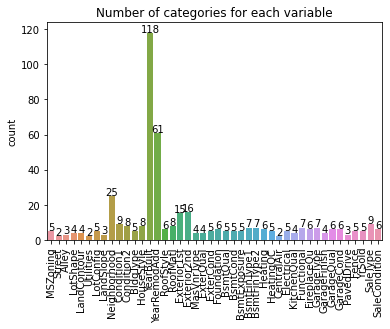

In [23]:
#Checking the number of categories in each categorical variables, so if it exceeds a range we can delete that category. We find that the n
cols = combined_set.select_dtypes(include=['object']).columns.tolist()
counts = [len(combined_set[col].value_counts().index.tolist()) for col in cols]
ax = sns.barplot(x = cols, y = counts)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title("Number of categories for each variable")
ax.set_ylabel("count")
BarPlotCount(ax,counts)
plt.show()

In [24]:
combined_set["YearBuilt"].value_counts()

2005    142
2006    138
2007    109
2004     99
2003     88
1920     57
1977     57
1976     54
1999     52
2008     49
1958     48
2000     48
2002     47
1998     46
1968     45
1954     43
1959     43
1910     43
1970     42
1967     41
1972     40
1978     39
1971     39
1956     39
1993     39
1950     38
1994     37
1960     37
1940     36
1966     35
1962     35
1957     35
2001     35
1997     35
1963     35
1965     34
1996     34
1955     34
1925     34
1961     34
1964     33
1995     31
1900     29
1969     28
1992     27
1948     27
1930     26
2009     25
1975     25
1915     24
1953     24
1980     23
1941     23
1974     23
1979     21
1973     21
1939     20
1990     19
1984     19
1926     19
1951     18
1952     18
1949     18
1923     17
1924     16
1922     16
1946     15
1988     15
1945     15
1938     13
1935     13
1991     12
1921     11
1936     11
1947     11
1918     10
1986     10
1916     10
1981      9
1937      9
1927      9
1928      9
1987      8
1989

In [25]:
#Dropping Year Built since it has too many categories to make a good judgement
combined_set.drop("YearBuilt", axis = 1, inplace=True)

In [26]:
combined_set.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,6.502440,RL,15.086532,13.424520,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,19.080038,Gd,TA,PConc,Gd,TA,No,GLQ,117.855863,Unf,0.000000,150.0,296.832338,GasA,Ex,Y,SBrkr,5.318379,854,0.0,7.234115,1.0,0.00000,2,1,3,0.750960,Gd,8,Typ,0,No,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0.000000,12.009558,0.000000,0.000000,0.0,0.0,No,0.000000,2,2008,WD,Normal
1,4.250991,RL,16.999620,13.694527,Pave,No,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,146.805798,Unf,0.000000,284.0,407.302427,GasA,Ex,Y,SBrkr,5.550627,0,0.0,6.947212,0.0,0.71081,2,0,3,0.750960,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,56.339208,0.000000,0.000000,0.000000,0.0,0.0,No,0.000000,5,2007,WD,Normal
2,6.502440,RL,15.484627,14.034133,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,17.459858,Gd,TA,PConc,Gd,TA,Mn,GLQ,91.575284,Unf,0.000000,434.0,314.805067,GasA,Ex,Y,SBrkr,5.362015,866,0.0,7.275132,1.0,0.00000,2,1,3,0.750960,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0.000000,9.849185,0.000000,0.000000,0.0,0.0,No,0.000000,9,2008,WD,Normal
3,6.865584,RL,14.403231,13.683421,Pave,No,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,52.776367,Unf,0.000000,540.0,268.234296,GasA,Gd,Y,SBrkr,5.388291,756,0.0,7.237969,1.0,0.00000,1,0,3,0.750960,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0.000000,8.921746,16.012025,0.000000,0.0,0.0,No,0.000000,2,2006,WD,Abnorml
4,6.502440,RL,17.480330,14.550142,Pave,No,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,24.880771,Gd,TA,PConc,Gd,TA,Av,GLQ,112.040325,Unf,0.000000,490.0,376.259375,GasA,Ex,Y,SBrkr,5.493032,1053,0.0,7.470741,1.0,0.00000,2,1,4,0.750960,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,42.351292,14.180238,0.000000,0.000000,0.0,0.0,No,0.000000,12,2008,WD,Normal
5,6.088630,RL,17.598802,14.527689,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1995,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,Wood,Gd,TA,No,GLQ,120.766684,Unf,0.000000,64.0,279.753503,GasA,Ex,Y,SBrkr,5.274167,566,0.0,7.019286,1.0,0.00000,1,1,1,0.750960,TA,5,Typ,0,No,Attchd,1993.0,Unf,2.0,480.0,TA,TA,Y,14.936458,8.196681,0.000000,7.112852,0.0,0.0,MnPrv,6.936389,10,2009,WD,Normal
6,4.250991,RL,16.382423,13.799372,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2005,Gable,CompShg,VinylSd,VinylSd,Stone,18.621800,Gd,TA,PConc,Ex,TA,Av,GLQ,184.077251,Unf,0.000000,317.0,515.690947,GasA,Ex,Y,SBrkr,5.722430,0,0.0,7.225247,1.0,0.00000,2,0,3,0.750960,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2.0,636.0,TA,TA,Y,50.930120,11.588875,0.000000,0.000000,0.0,0.0,No,0.000000,8,2007,WD,Normal
7,6.502440,RL,17.183319,13.861651,Pave,No,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,Gable,CompShg,HdBoard,HdBoard,Stone,20.949303,TA,TA,CBlock,Gd,TA,Mn,ALQ,134.521181,BLQ,4.748093,216.0,366.051596,GasA,Ex,Y,SBrkr,5.472956,983,0.0,7.423287,1.0,0.00000,2,1,3,0.750960,TA,7,Typ,2,TA,Att

In [27]:
#Filling categorical variables with dummies
cols = combined_set.select_dtypes(include=['object']).columns.tolist()
combined_set = pd.get_dummies(combined_set, columns = cols, drop_first=True)
combined_set.shape

(2919, 313)

####Training Models

In [28]:
#Splitting training and testing set
training_set = combined_set.iloc[:training_shape_x,:]
test_set = combined_set.iloc[training_shape_x:,:]
training_set = training_set.to_numpy()
test_set = test_set.to_numpy()

##Hyperparameters tuning

In [ ]:
#Gradient Boosting regressor Hyperparameters tuning
parameters = {'n_estimators' : range(1000,3001,1000), 'min_samples_split':range(15, 26, 10), 'min_samples_leaf':range(10, 21, 10), 'learning_rate' : list(map(lambda x: x/100.0, range(5, 16, 10)))}
gbrParams = GridSearchCV(estimator = GradientBoostingRegressor(loss = 'ls'), 
param_grid = parameters, cv = kf)
gbrParams.fit(training_set,train_Y)
gbrParams.best_params_, gbrParams.best_score_

({'learning_rate': 0.05,
  'min_samples_leaf': 20,
  'min_samples_split': 25,
  'n_estimators': 1000},
 0.8981805567749586)

In [ ]:
#Adaboost Regressors Hyperparameters tuning
parameters = {'n_estimators' : range(500,5001,1000), 'learning_rate' : list(map(lambda x: x/100.0, range(5, 51, 10)))}
gsAdaBoostr = GridSearchCV(estimator = AdaBoostRegressor(), 
param_grid = parameters, cv = kf)
gsAdaBoostr.fit(training_set,train_Y)
gsAdaBoostr.best_params_, gsAdaBoostr.best_score_

({'learning_rate': 0.05, 'n_estimators': 500}, 0.8000061573740742)

In [ ]:
#Random Forest Regressors Hyperparameters tuning
parameters = {'n_estimators' : range(1000,3001,1000), 'min_samples_split':range(15, 26, 10), 'min_samples_leaf':range(20, 41, 10), 'max_depth': range(5, 16, 10)}
gsRndmFrst = GridSearchCV(estimator = RandomForestRegressor(), 
param_grid = parameters, cv = kf)
gsRndmFrst.fit(training_set,train_Y)
gsRndmFrst.best_params_, gsRndmFrst.best_score_

({'max_depth': 15,
  'min_samples_leaf': 20,
  'min_samples_split': 15,
  'n_estimators': 3000},
 0.8330310721313883)

In [ ]:
#XGB Regressor Hyperparameters tuning
parameters = {'n_estimators' : range(1000,2001,1000), 'max_depth': range(5, 11, 5), 'reg_alpha':[1e-5, 1e-2, 0.1, 1], 'gamma':list(map(lambda x: x/10.0 , range(2,4))), 'learning_rate' : list(map(lambda x: x/100.0, range(5, 11, 5)))}
XGBRParams = GridSearchCV(estimator = XGBRegressor(booster="gbtree"), 
param_grid = parameters, cv = kf)
XGBRParams.fit(training_set,train_Y)
XGBRParams.best_params_, XGBRParams.best_score_

({'gamma': 0.2,
  'learning_rate': 0.1,
  'max_depth': 10,
  'n_estimators': 1000,
  'reg_alpha': 0.1},
 0.8777121791407827)

In [29]:
#SVR Regressor Hyperparameters tuning
parameters = {'C': [0.1, 1, 10, 20], 'gamma': [0.01, 0.1, 1, 10], 'kernel': ['rbf']}
SVRParams = GridSearchCV(estimator = SVR(), 
param_grid = parameters, cv = kf)
SVRParams.fit(training_set,train_Y)
SVRParams.best_params_, SVRParams.best_score_

({'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}, 0.011447653093556932)

In [30]:
#SVR Regressor
parameters = {'C': [10, 20, 30], 'gamma': [1e-3, 8e-3,20e-3],'epsilon': [0.008, 0.0001, 0.01, 0.1 , 0.005, 0.5] , 'kernel': [ 'rbf' , 'sigmoid']}
SVRParams = GridSearchCV(estimator = SVR(), 
param_grid = parameters, cv = kf)
SVRParams.fit(training_set,train_Y)
SVRParams.best_params_, SVRParams.best_score_

({'C': 10, 'epsilon': 0.0001, 'gamma': 0.001, 'kernel': 'rbf'},
 0.14731855459925686)

In [33]:
def CVS(estimator, X, y):
  res = np.sqrt(-cross_val_score(estimator, X, y, scoring="neg_mean_squared_error", cv=kf))
  print("mean: %.3f"%res.mean()," Standard Deviation: %.3f"% res.std())
  return res.mean()
  

In [50]:
lre = LinearRegression()
gbr = GradientBoostingRegressor(loss = 'ls', n_estimators=1000, learning_rate= 0.05, min_samples_leaf= 20, min_samples_split = 25, random_state=0)
rfr = RandomForestRegressor(n_estimators= 3000, min_samples_split = 15, min_samples_leaf = 20, max_depth = 15,random_state= 0)
abr = AdaBoostRegressor(random_state= 0, learning_rate=0.05, n_estimators= 500)
xgb = XGBRegressor(gamma = 0.2, learning_rate = 0.1, max_depth= 10, n_estimators= 1000, reg_alpha= 0.1, random_state=0, silent=True)
svr = make_pipeline(RobustScaler(), SVR(kernel = 'rbf',C= 40, epsilon= 8e-3, gamma=3e-4))
scv = StackingCVRegressor(regressors=(lre, rfr, gbr, abr, xgb, svr), meta_regressor=gbr, use_features_in_secondary=True)

In [51]:
#setting up Cross Validation folds
algorithms = []
CVScore = []

print("Linear Regression")
l_mean = CVS(lre, training_set, train_Y)
algorithms.append("Linear")
CVScore.append(l_mean)

print("Gradient boosting Regressor")
g_mean = CVS(gbr, training_set, train_Y)
algorithms.append("Grdnt Bstng")
CVScore.append(g_mean)

print("Random Forest Regressor")
r_mean = CVS(rfr, training_set, train_Y)
algorithms.append("Rndm Frst")
CVScore.append(r_mean)

print("AdaBoost Regressor")
a_mean = CVS(abr, training_set, train_Y)
algorithms.append("AdaBoost")
CVScore.append(a_mean)

print("XGB Regressor")
x_mean = CVS(xgb, training_set, train_Y)
algorithms.append("XGB")
CVScore.append(x_mean)

print("support vector Regressor")
s_mean = CVS(svr, training_set, train_Y)
algorithms.append("sprt vct")
CVScore.append(s_mean)



Linear Regression
mean: 0.163  Standard Deviation: 0.059
Gradient boosting Regressor
mean: 0.129  Standard Deviation: 0.017
Random Forest Regressor
mean: 0.160  Standard Deviation: 0.018
AdaBoost Regressor
mean: 0.175  Standard Deviation: 0.024
XGB Regressor
mean: 0.144  Standard Deviation: 0.023
support vector Regressor
mean: 0.129  Standard Deviation: 0.032


In [52]:
def blended_predictions(X_test):
  return (lre.fit(training_set, train_Y).predict(X_test) * 0.05
            +gbr.fit(training_set, train_Y).predict(X_test) * 0.20
            +rfr.fit(training_set, train_Y).predict(X_test) * 0.15
            +abr.fit(training_set, train_Y).predict(X_test) * 0.05
            +xgb.fit(training_set, train_Y).predict(X_test) * 0.20
            +svr.fit(training_set, train_Y).predict(X_test) * 0.15
            +scv.fit(training_set, train_Y).predict(X_test) * 0.20
    )

y_pred = blended_predictions(training_set)
print("RMSE: %.3f"% (np.sqrt(mean_squared_error(train_Y,y_pred))))
algorithms.append("Blended")
CVScore.append(np.sqrt(mean_squared_error(train_Y,y_pred)))

RMSE: 0.080


['Linear',
 'Gradient boosting',
 'Random Forest',
 'AdaBoost',
 'XGB',
 'support vector',
 'Blended']

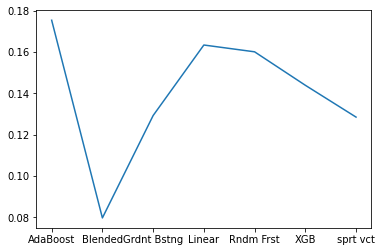

In [53]:
#Plotting the performance of the Algorithms to select the best one for predicting the output
ax = sns.lineplot(x = algorithms, y = CVScore)
plt.show()


In [82]:
Preds = pd.DataFrame(np.floor(np.expm1(blended_predictions(test_set))), columns=["SalePrice"])
test_Ids = pd.DataFrame(test_Ids)
Final_pred = pd.concat([test_Ids, Preds],axis=1)
Final_pred.to_csv("submission.csv", index= False)

In [80]:
Final_pred

,Id,0
0,1461,122198.0
1,1462,156062.0
2,1463,183167.0
3,1464,190306.0
4,1465,193902.0
5,1466,172786.0
6,1467,172451.0
7,1468,165814.0
8,1469,187092.0
9,1470,126422.0
